In [1]:
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from IPython.display import display_html 

In [2]:
from metadata_utils import get_metadata, get_tuned_alg_perf, process_metafeatures, compute_feature_corrs

## Read Meta-dataset and dataset meta-features

In [3]:
dataset_version = "_v0"
# For choosing metafeatures
filter_families = [
    'general',
    'statistical',
    'info-theory']

In [4]:
metadataset_df, metafeatures_df = get_metadata(dataset_version)

metafeatures_processed = process_metafeatures(metafeatures_df, filter_families=filter_families)
metafeatures_df = metafeatures_processed

In [5]:
metafeatures_df.head()

,dataset_name,f__pymfe.general.attr_to_inst,f__pymfe.general.cat_to_num,f__pymfe.general.freq_class.count,f__pymfe.general.freq_class.histogram.0,f__pymfe.general.freq_class.histogram.1,f__pymfe.general.freq_class.histogram.2,f__pymfe.general.freq_class.histogram.3,f__pymfe.general.freq_class.histogram.4,f__pymfe.general.freq_class.histogram.5,...,f__pymfe.info-theory.mut_inf.quantiles.1,f__pymfe.info-theory.mut_inf.quantiles.2,f__pymfe.info-theory.mut_inf.quantiles.3,f__pymfe.info-theory.mut_inf.quantiles.4,f__pymfe.info-theory.mut_inf.range,f__pymfe.info-theory.mut_inf.sd,f__pymfe.info-theory.mut_inf.skewness,f__pymfe.info-theory.ns_ratio,f__pymfe.statistical.iq_range,f__pymfe.statistical.t_mean
0,openml__pc4__3902__fold_0,0.031732,0.0,2,0.5,0.0,0.0,0.0,0.0,0.0,...,0.008414,0.018632,0.036939,0.132105,0.129517,0.036463,1.022602,38.780852,NaN,NaN
1,openml__pc4__3902__fold_1,0.031732,0.0,2,0.5,0.0,0.0,0.0,0.0,0.0,...,0.008414,0.018632,0.036939,0.132105,0.129517,0.036463,1.022602,38.780852,NaN,NaN
2,openml__pc4__3902__fold_2,0.031732,0.0,2,0.5,0.0,0.0,0.0,0.0,0.0,...,0.008414,0.018632,0.036939,0.132105,0.129517,0.036463,1.022602,38.780852,NaN,NaN
3,openml__pc4__3902__fold_3,0.031732,0.0,2,0.5,0.0,0.0,0.0,0.0,0.0,...,0.008414,0.018632,0.036939,0.132105,0.129517,0.036463,1.022602,38.780852,NaN,NaN
4,openml__pc4__3902__fold_4,0.031732,0.0,2,0.5,0.0,0.0,0.0,0.0,0.0,...,0.008414,0.018632,0.036939,0.132105,0.129517,0.036463,1.022602,38.780852,NaN,NaN


## Feature correlations

In [6]:
metric = "F1" # Choices: "Accuracy", "F1", "Log Loss"

In [7]:
tuned_alg_perf = get_tuned_alg_perf(metadataset_df, metric=metric)
tuned_alg_perf

,results_bucket_path,dataset_fold_id,dataset_name,alg_name,hparam_source,trial_number,alg_hparam_id,exp_name,time__train,Log Loss__train,...,AUC__test,Accuracy__test,F1__test,time__train-eval,MSE__train,R2__train,MSE__val,R2__val,MSE__test,R2__test
20.0,results/openml__APSFailure__168868/CatBoost/gp...,openml__APSFailure__168868__fold_0,openml__APSFailure__168868,CatBoost,random_27_s0,27,CatBoost__seed_0__trial_27,gpu-expt-a_091822_065111_fdd9.zip,5.285700,0.012935,...,0.990643,0.994211,0.994211,0.146698,NaN,NaN,NaN,NaN,NaN,NaN
150.0,results/openml__APSFailure__168868/CatBoost/gp...,openml__APSFailure__168868__fold_1,openml__APSFailure__168868,CatBoost,random_3_s0,3,CatBoost__seed_0__trial_3,gpu-expt-a_091822_065111_fdd9.zip,3.450149,0.011320,...,0.988862,0.992105,0.992105,0.140466,NaN,NaN,NaN,NaN,NaN,NaN
282.0,results/openml__APSFailure__168868/CatBoost/gp...,openml__APSFailure__168868__fold_2,openml__APSFailure__168868,CatBoost,random_8_s0,8,CatBoost__seed_0__trial_8,gpu-expt-a_091822_065111_fdd9.zip,11.938921,0.007183,...,0.995551,0.993421,0.993421,0.173912,NaN,NaN,NaN,NaN,NaN,NaN
394.0,results/openml__APSFailure__168868/CatBoost/gp...,openml__APSFailure__168868__fold_3,openml__APSFailure__168868,CatBoost,random_20_s0,20,CatBoost__seed_0__trial_20,gpu-expt-a_091822_065111_fdd9.zip,7.538957,0.011646,...,0.991612,0.994868,0.994868,0.179523,NaN,NaN,NaN,NaN,NaN,NaN
536.0,results/openml__APSFailure__168868/CatBoost/gp...,openml__APSFailure__168868__fold_4,openml__APSFailure__168868,CatBoost,random_8_s0,8,CatBoost__seed_0__trial_8,gpu-expt-a_091822_065111_fdd9.zip,11.805938,0.007725,...,0.989614,0.995658,0.995658,0.179625,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191448.0,results/openml__wilt__146820/XGBoost/gpu-expt-...,openml__wilt__146820__fold_5,openml__wilt__146820,XGBoost,default,0,XGBoost__seed_0__trial_0,gpu-expt-a_091722_220903_21b9.zip,0.142135,0.039770,...,0.955786,0.983471,0.983471,0.006239,NaN,NaN,NaN,NaN,NaN,NaN
191671.0,results/openml__wilt__146820/XGBoost/gpu-expt-...,openml__wilt__146820__fold_6,openml__wilt__146820,XGBoost,random_22_s0,22,XGBoost__seed_0__trial_22,gpu-expt-a_091722_220903_21b9.zip,0.116242,0.022093,...,0.997229,0.985537,0.985537,0.003031,NaN,NaN,NaN,NaN,NaN,NaN
191865.0,results/openml__wilt__146820/XGBoost/gpu-expt-...,openml__wilt__146820__fold_7,openml__wilt__146820,XGBoost,random_1_s0,1,XGBoost__seed_0__trial_1,gpu-expt-a_091722_220903_21b9.zip,0.235586,0.032988,...,0.996977,0.983471,0.983471,0.006548,NaN,NaN,NaN,NaN,NaN,NaN
192092.0,results/openml__wilt__146820/XGBoost/gpu-expt-...,openml__wilt__146820__fold_8,openml__wilt__146820,XGBoost,random_27_s0,27,XGBoost__seed_0__trial_27,gpu-expt-a_091722_220903_21b9.zip,0.120812,0.016541,...,0.994732,0.991736,0.991736,0.005032,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
joined_df = tuned_alg_perf.merge(metafeatures_df, right_on="dataset_name", left_on="dataset_fold_id", how='left')

In [9]:
feature_corrs = compute_feature_corrs(joined_df, metric)

In [10]:
feature_corrs

,CatBoost,KNN,LinearModel,MLP,SVM,TabNet,XGBoost
f__pymfe.general.attr_to_inst,0.011090,-0.031926,-0.032950,-0.119380,0.079147,0.044133,-0.106283
f__pymfe.general.cat_to_num,0.083275,0.079179,0.103248,0.090766,0.076055,0.075865,0.075563
f__pymfe.general.freq_class.count,-0.077161,-0.313115,-0.077371,-0.356156,0.170551,0.132444,-0.021592
f__pymfe.general.freq_class.histogram.0,-0.071406,-0.107817,0.089720,0.089372,-0.121028,-0.077955,0.009150
f__pymfe.general.freq_class.histogram.1,-0.156946,-0.222643,-0.119011,-0.330839,-0.250678,-0.221312,-0.117483
...,...,...,...,...,...,...,...
f__pymfe.info-theory.mut_inf.sd,0.028717,-0.063948,0.029083,-0.127704,-0.002781,0.035916,0.013562
f__pymfe.info-theory.mut_inf.skewness,0.245342,0.219388,0.277147,0.228157,0.339015,0.345046,0.233254
f__pymfe.info-theory.ns_ratio,-0.027896,-0.000910,-0.042480,0.034949,-0.027680,-0.032708,0.011497
f__pymfe.statistical.iq_range,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Correlations between pairs of algorithms

In [29]:
def alg_performance_difference(tuned_alg_perf, metric, alg_pair):
    perf_pair = [tuned_alg_perf[tuned_alg_perf["alg_name"] == alg].set_index("dataset_fold_id") for alg in alg_pair]
    delta = perf_pair[0][f"{metric}__test"] - perf_pair[1][f"{metric}__test"]
    delta = delta.loc[perf_pair[0].index.intersection(perf_pair[1].index)]
    return delta

In [30]:
def alg_performance_matrix(tuned_alg_perf, metafeatures_df, metric):
    all_deltas = []
    mean_deltas = []
    for alg_pair in itertools.combinations(tuned_alg_perf["alg_name"].unique(), 2):
        delta = alg_performance_difference(tuned_alg_perf, metric, alg_pair)
        delta.name = "{}-{}".format(*alg_pair)
        all_deltas.append(delta)
        mean_deltas += [
            {"pair": alg_pair, "mean_delta": delta.mean()},
            {"pair": (alg_pair[1], alg_pair[0]), "mean_delta": -delta.mean()},
            #{"pair": (alg_pair[1], alg_pair[0]), "max": -pair_corr.min(), "idxmax": pair_corr.idxmin()},
        ]
    all_deltas = pd.concat(all_deltas, axis=1).T

    mean_deltas = pd.DataFrame(mean_deltas).set_index("pair")
    mean_deltas.index = pd.MultiIndex.from_tuples(mean_deltas.index)
    
    return mean_deltas, all_deltas

In [21]:
def alg_pair_corrs(tuned_alg_perf, metafeatures_df, metric, alg_pair, as_abs=False):
    delta = alg_performance_difference(tuned_alg_perf, metric, alg_pair)
    delta.name = "delta_perf"

    delta_mf = metafeatures_df.merge(delta, left_on="dataset_name", right_index=True, how='right')
    corr_columns = [col_name for col_name in metafeatures_df if col_name.startswith("f__")]
    results = delta_mf[corr_columns].corrwith(delta_mf["delta_perf"])
    if as_abs:
        return results.abs().sort_values(ascending=False)
    else:
        return results.sort_values(ascending=False)

In [22]:
def all_alg_pair_corrs(tuned_alg_perf, metafeatures_df, metric):
    all_pair_corrs = []

    max_corrs = []
    for alg_pair in itertools.combinations(tuned_alg_perf["alg_name"].unique(), 2):
        pair_corr = alg_pair_corrs(tuned_alg_perf, metafeatures_df, metric, alg_pair)
        pair_corr.name = "{}-{}".format(*alg_pair)
        all_pair_corrs.append(pair_corr)
        idxmax = pair_corr.abs().idxmax()
        corr = pair_corr[idxmax]
        max_corrs += [
            {"pair": alg_pair, "max_corr": corr, "max_abs": abs(corr), "metafeature": idxmax},
            {"pair": (alg_pair[1], alg_pair[0]), "max_corr": corr, "max_abs": abs(corr), "metafeature": idxmax},
            #{"pair": (alg_pair[1], alg_pair[0]), "max": -pair_corr.min(), "idxmax": pair_corr.idxmin()},
        ]
    all_pair_corrs = pd.concat(all_pair_corrs, axis=1).T

    max_corrs = pd.DataFrame(max_corrs).set_index("pair")
    max_corrs.index = pd.MultiIndex.from_tuples(max_corrs.index)
    
    return max_corrs, all_pair_corrs

In [8]:
def plot_matrix(matrix, cmap='viridis', title=None):
    cellsize = 5
    fig, ax = plt.subplots(1,1,figsize=(cellsize*1.2, cellsize*matrix.shape[0]/matrix.shape[1]))
    im = ax.pcolormesh(matrix, edgecolor='k', linewidth=0.5, cmap=cmap) 
    if title is not None:
        plt.title(title)
    plt.gca().invert_yaxis()
    ax.set_xticks([])
    ax.set_xticklabels('')
    ax.set_xticks([c+0.5 for c in range(matrix.shape[0]-0)], minor=True)

    ax.set_xticklabels(matrix.columns, minor=True, rotation=90)
    ax.set_yticks([])
    ax.set_yticklabels('')    
    ax.set_yticks([c+0.5 for c in range(matrix.shape[1]-0)], minor=True)
    ax.set_yticklabels(matrix.index, minor=True)
    fig.colorbar(im, ax=ax)
        

In [38]:
metrics = ["F1", "Log Loss", "Accuracy"]

In [39]:
max_corrs, all_pair_corrs = {}, {}
mean_deltas, all_deltas = {}, {}
for metric in metrics:
    tuned_alg_perf = get_tuned_alg_perf(metadataset_df, metric=metric)
    joined_df = tuned_alg_perf.merge(metafeatures_df, right_on="dataset_name", left_on="dataset_fold_id", how='left')
    
    max_corrs[metric], all_pair_corrs[metric] = all_alg_pair_corrs(tuned_alg_perf, metafeatures_df, metric)
    mean_deltas[metric], all_deltas[metric] = alg_performance_matrix(tuned_alg_perf, metafeatures_df, metric)

In [63]:
def show_metric_corr_results(metric):
    comp_matrix = max_corrs[metric]["max_abs"].unstack()
    plot_matrix(comp_matrix, title=f"Max Correlation with Performance Difference ({metric})")
    plot_matrix(mean_deltas[metric]["mean_delta"].unstack(), title=f"Performance Difference Mean ({metric})", cmap="RdBu")
    feat_names = max_corrs[metric]["metafeature"].unstack()
    feat_names = feat_names.applymap(lambda entry: entry.replace("f__pymfe.", "") if type(entry) is str else entry)
    display_html(feat_names)

,CatBoost,KNN,LinearModel,MLP,SVM,TabNet,XGBoost
CatBoost,NaN,statistical.mean.histogram.0,statistical.can_cor.skewness,general.freq_class.histogram.1,statistical.median.sd,statistical.cor.skewness,statistical.min.histogram.2
KNN,statistical.mean.histogram.0,NaN,statistical.min.histogram.8,general.freq_class.histogram.1,info-theory.joint_ent.histogram.9,statistical.mad.sd,statistical.mean.histogram.0
LinearModel,statistical.can_cor.skewness,statistical.min.histogram.8,NaN,info-theory.class_conc.mean,info-theory.attr_conc.histogram.9,general.freq_class.histogram.2,statistical.can_cor.skewness
MLP,general.freq_class.histogram.1,general.freq_class.histogram.1,info-theory.class_conc.mean,NaN,statistical.can_cor.range,statistical.mad.quantiles.4,general.nr_class
SVM,statistical.median.sd,info-theory.joint_ent.histogram.9,info-theory.attr_conc.histogram.9,statistical.can_cor.range,NaN,statistical.mean.mean,statistical.median.sd
TabNet,statistical.cor.skewness,statistical.mad.sd,general.freq_class.histogram.2,statistical.mad.quantiles.4,statistical.mean.mean,NaN,statistical.cor.skewness
XGBoost,statistical.min.histogram.2,statistical.mean.histogram.0,statistical.can_cor.skewness,general.nr_class,statistical.median.sd,statistical.cor.skewness,NaN


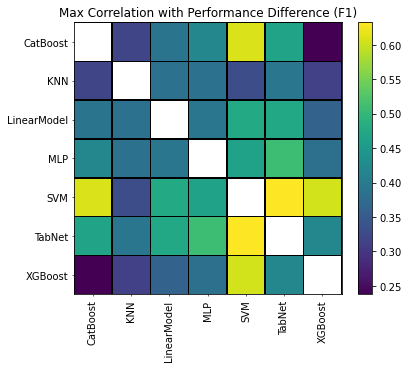

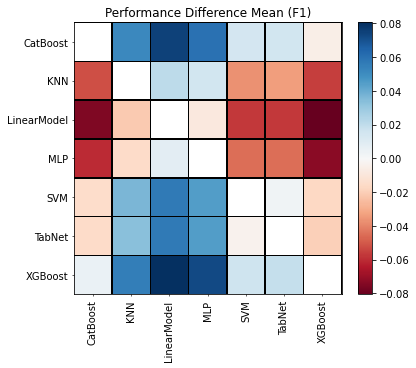

In [64]:
show_metric_corr_results("F1")

,CatBoost,KNN,LinearModel,MLP,SVM,TabNet,XGBoost
CatBoost,NaN,general.freq_class.kurtosis,general.freq_class.kurtosis,statistical.can_cor.histogram.3,statistical.t_mean.mean,info-theory.mut_inf.min,general.freq_class.kurtosis
KNN,general.freq_class.kurtosis,NaN,statistical.min.histogram.4,statistical.can_cor.histogram.3,statistical.sparsity.histogram.5,statistical.gravity,general.freq_class.skewness
LinearModel,general.freq_class.kurtosis,statistical.min.histogram.4,NaN,statistical.cov.count,statistical.can_cor.range,general.freq_class.quantiles.1,statistical.min.histogram.4
MLP,statistical.can_cor.histogram.3,statistical.can_cor.histogram.3,statistical.cov.count,NaN,statistical.cov.range,statistical.cov.range,statistical.h_mean.count
SVM,statistical.t_mean.mean,statistical.sparsity.histogram.5,statistical.can_cor.range,statistical.cov.range,NaN,info-theory.mut_inf.min,statistical.t_mean.mean
TabNet,info-theory.mut_inf.min,statistical.gravity,general.freq_class.quantiles.1,statistical.cov.range,info-theory.mut_inf.min,NaN,info-theory.mut_inf.quantiles.0
XGBoost,general.freq_class.kurtosis,general.freq_class.skewness,statistical.min.histogram.4,statistical.h_mean.count,statistical.t_mean.mean,info-theory.mut_inf.quantiles.0,NaN


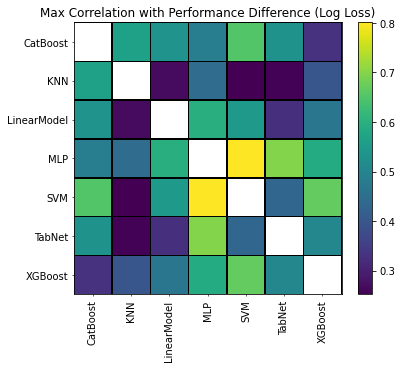

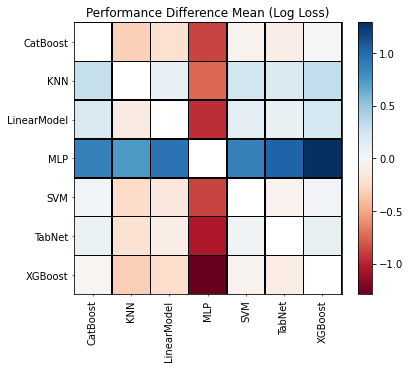

In [65]:
show_metric_corr_results("Log Loss")

,CatBoost,KNN,LinearModel,MLP,SVM,TabNet,XGBoost
CatBoost,NaN,statistical.iq_range.histogram.0,statistical.can_cor.skewness,info-theory.mut_inf.quantiles.3,statistical.t_mean.mean,statistical.cor.skewness,statistical.min.histogram.2
KNN,statistical.iq_range.histogram.0,NaN,statistical.min.histogram.8,statistical.t_mean.quantiles.1,info-theory.attr_ent.min,info-theory.joint_ent.histogram.9,statistical.mean.histogram.0
LinearModel,statistical.can_cor.skewness,statistical.min.histogram.8,NaN,info-theory.mut_inf.max,info-theory.attr_conc.histogram.9,info-theory.attr_ent.histogram.9,statistical.can_cor.skewness
MLP,info-theory.mut_inf.quantiles.3,statistical.t_mean.quantiles.1,info-theory.mut_inf.max,NaN,statistical.can_cor.range,general.nr_class,general.freq_class.count
SVM,statistical.t_mean.mean,info-theory.attr_ent.min,info-theory.attr_conc.histogram.9,statistical.can_cor.range,NaN,statistical.median.mean,statistical.median.sd
TabNet,statistical.cor.skewness,info-theory.joint_ent.histogram.9,info-theory.attr_ent.histogram.9,general.nr_class,statistical.median.mean,NaN,statistical.cor.skewness
XGBoost,statistical.min.histogram.2,statistical.mean.histogram.0,statistical.can_cor.skewness,general.freq_class.count,statistical.median.sd,statistical.cor.skewness,NaN


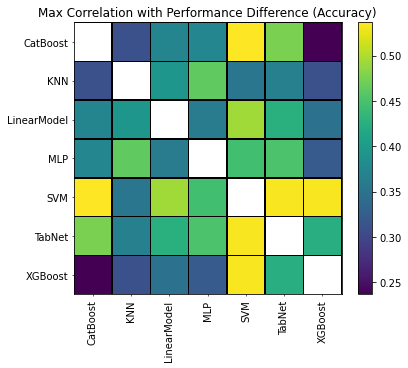

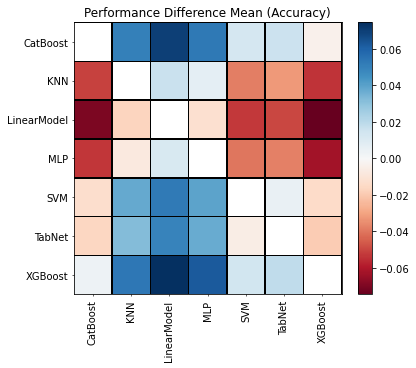

In [66]:
show_metric_corr_results("Accuracy")

In [55]:
max_corrs["F1"].sort_index()

max_corr   max_abs  \
CatBoost    KNN          0.318725  0.318725   
            LinearModel  0.390346  0.390346   
            MLP          0.420426  0.420426   
            SVM          0.610234  0.610234   
            TabNet       0.466354  0.466354   
            XGBoost     -0.237729  0.237729   
KNN         CatBoost     0.318725  0.318725   
            LinearModel  0.386802  0.386802   
            MLP          0.385026  0.385026   
            SVM         -0.330228  0.330228   
            TabNet      -0.392273  0.392273   
            XGBoost     -0.313255  0.313255   
LinearModel CatBoost     0.390346  0.390346   
            KNN          0.386802  0.386802   
            MLP          0.393137  0.393137   
            SVM         -0.476101  0.476101   
            TabNet      -0.474724  0.474724   
            XGBoost     -0.361431  0.361431   
MLP         CatBoost     0.420426  0.420426   
            KNN          0.385026  0.385026   
            LinearModel  0.393137  0.393137   
            SVM         -0.465290  0.465290   
            TabNet      -0.509076  0.509076   
            XGBoost     -0.382080  0.382080   
SVM         CatBoost     0.610234  0.610234   
            KNN         -0.330228  0.330228   
            LinearModel -0.476101  0.476101   
            MLP         -0.465290  0.465290   
            TabNet      -0.632648  0.632648   
            XGBoost     -0.606159  0.606159   
TabNet      CatBoost     0.466354  0.466354   
            KNN         -0.392273  0.392273   
            LinearModel -0.474724  0.474724   
            MLP         -0.509076  0.509076   
            SVM         -0.632648  0.632648   
            XGBoost     -0.420872  0.420872   
XGBoost     CatBoost    -0.237729  0.237729   
            KNN         -0.313255  0.313255   
            LinearModel -0.361431  0.361431   
            MLP         -0.382080  0.382080   
            SVM         -0.606159  0.606159   
            TabNet      -0.420872  0.420872   

                                                        metafeature  
CatBoost    KNN               f__pymfe.statistical.mean.histogram.0  
            LinearModel       f__pymfe.statistical.can_cor.skewness  
            MLP             f__pymfe.general.freq_class.histogram.1  
            SVM                      f__pymfe.statistical.median.sd  
            TabNet                f__pymfe.statistical.cor.skewness  
            XGBoost            f__pymfe.statistical.min.histogram.2  
KNN         CatBoost          f__pymfe.statistical.mean.histogram.0  
            LinearModel        f__pymfe.statistical.min.histogram.8  
            MLP             f__pymfe.general.freq_class.histogram.1  
            SVM          f__pymfe.info-theory.joint_ent.histogram.9  
            TabNet                      f__pymfe.statistical.mad.sd  
            XGBoost           f__pymfe.statistical.mean.histogram.0  
LinearModel CatBoost          f__pymfe.statistical.can_cor.skewness  
            KNN                f__pymfe.statistical.min.histogram.8  
            MLP                f__pymfe.info-theory.class_conc.mean  
            SVM          f__pymfe.info-theory.attr_conc.histogram.9  
            TabNet          f__pymfe.general.freq_class.histogram.2  
            XGBoost           f__pymfe.statistical.can_cor.skewness  
MLP         CatBoost        f__pymfe.general.freq_class.histogram.1  
            KNN             f__pymfe.general.freq_class.histogram.1  
            LinearModel        f__pymfe.info-theory.class_conc.mean  
            SVM                  f__pymfe.statistical.can_cor.range  
            TabNet             f__pymfe.statistical.mad.quantiles.4  
            XGBoost                       f__pymfe.general.nr_class  
SVM         CatBoost                 f__pymfe.statistical.median.sd  
            KNN          f__pymfe.info-theory.joint_ent.histogram.9  
            LinearModel  f__pymfe.info-theory.attr_conc.histogram.9  
            MLP                  f__pymfe.s

In [57]:
max_corrs["Log Loss"].sort_index()

max_corr   max_abs  \
CatBoost    KNN         -0.563202  0.563202   
            LinearModel -0.533854  0.533854   
            MLP         -0.481899  0.481899   
            SVM         -0.651033  0.651033   
            TabNet      -0.529123  0.529123   
            XGBoost      0.329904  0.329904   
KNN         CatBoost    -0.563202  0.563202   
            LinearModel -0.269288  0.269288   
            MLP         -0.443298  0.443298   
            SVM          0.252416  0.252416   
            TabNet       0.256373  0.256373   
            XGBoost      0.398984  0.398984   
LinearModel CatBoost    -0.533854  0.533854   
            KNN         -0.269288  0.269288   
            MLP         -0.599399  0.599399   
            SVM          0.549331  0.549331   
            TabNet      -0.328074  0.328074   
            XGBoost      0.468455  0.468455   
MLP         CatBoost    -0.481899  0.481899   
            KNN         -0.443298  0.443298   
            LinearModel -0.599399  0.599399   
            SVM          0.800800  0.800800   
            TabNet       0.698256  0.698256   
            XGBoost      0.588060  0.588060   
SVM         CatBoost    -0.651033  0.651033   
            KNN          0.252416  0.252416   
            LinearModel  0.549331  0.549331   
            MLP          0.800800  0.800800   
            TabNet      -0.432023  0.432023   
            XGBoost      0.669152  0.669152   
TabNet      CatBoost    -0.529123  0.529123   
            KNN          0.256373  0.256373   
            LinearModel -0.328074  0.328074   
            MLP          0.698256  0.698256   
            SVM         -0.432023  0.432023   
            XGBoost      0.506305  0.506305   
XGBoost     CatBoost     0.329904  0.329904   
            KNN          0.398984  0.398984   
            LinearModel  0.468455  0.468455   
            MLP          0.588060  0.588060   
            SVM          0.669152  0.669152   
            TabNet       0.506305  0.506305   

                                                       metafeature  
CatBoost    KNN               f__pymfe.general.freq_class.kurtosis  
            LinearModel       f__pymfe.general.freq_class.kurtosis  
            MLP           f__pymfe.statistical.can_cor.histogram.3  
            SVM                   f__pymfe.statistical.t_mean.mean  
            TabNet                f__pymfe.info-theory.mut_inf.min  
            XGBoost           f__pymfe.general.freq_class.kurtosis  
KNN         CatBoost          f__pymfe.general.freq_class.kurtosis  
            LinearModel       f__pymfe.statistical.min.histogram.4  
            MLP           f__pymfe.statistical.can_cor.histogram.3  
            SVM          f__pymfe.statistical.sparsity.histogram.5  
            TabNet                    f__pymfe.statistical.gravity  
            XGBoost           f__pymfe.general.freq_class.skewness  
LinearModel CatBoost          f__pymfe.general.freq_class.kurtosis  
            KNN               f__pymfe.statistical.min.histogram.4  
            MLP                     f__pymfe.statistical.cov.count  
            SVM                 f__pymfe.statistical.can_cor.range  
            TabNet         f__pymfe.general.freq_class.quantiles.1  
            XGBoost           f__pymfe.statistical.min.histogram.4  
MLP         CatBoost      f__pymfe.statistical.can_cor.histogram.3  
            KNN           f__pymfe.statistical.can_cor.histogram.3  
            LinearModel             f__pymfe.statistical.cov.count  
            SVM                     f__pymfe.statistical.cov.range  
            TabNet                  f__pymfe.statistical.cov.range  
            XGBoost              f__pymfe.statistical.h_mean.count  
SVM         CatBoost              f__pymfe.statistical.t_mean.mean  
            KNN          f__pymfe.statistical.sparsity.histogram.5  
            LinearModel         f__pymfe.statistical.can_cor.range  
            MLP                     f__pymfe.statistical.cov.range  
  

In [58]:
max_corrs["Accuracy"].sort_index()

max_corr   max_abs  \
CatBoost    KNN          0.311004  0.311004   
            LinearModel  0.373723  0.373723   
            MLP          0.374507  0.374507   
            SVM          0.536518  0.536518   
            TabNet       0.476117  0.476117   
            XGBoost     -0.236944  0.236944   
KNN         CatBoost     0.311004  0.311004   
            LinearModel  0.394670  0.394670   
            MLP          0.463395  0.463395   
            SVM         -0.354233  0.354233   
            TabNet      -0.366271  0.366271   
            XGBoost     -0.311164  0.311164   
LinearModel CatBoost     0.373723  0.373723   
            KNN          0.394670  0.394670   
            MLP          0.360099  0.360099   
            SVM         -0.494299  0.494299   
            TabNet      -0.426923  0.426923   
            XGBoost     -0.348507  0.348507   
MLP         CatBoost     0.374507  0.374507   
            KNN          0.463395  0.463395   
            LinearModel  0.360099  0.360099   
            SVM         -0.445532  0.445532   
            TabNet      -0.451444  0.451444   
            XGBoost     -0.321305  0.321305   
SVM         CatBoost     0.536518  0.536518   
            KNN         -0.354233  0.354233   
            LinearModel -0.494299  0.494299   
            MLP         -0.445532  0.445532   
            TabNet      -0.533282  0.533282   
            XGBoost     -0.533256  0.533256   
TabNet      CatBoost     0.476117  0.476117   
            KNN         -0.366271  0.366271   
            LinearModel -0.426923  0.426923   
            MLP         -0.451444  0.451444   
            SVM         -0.533282  0.533282   
            XGBoost     -0.424644  0.424644   
XGBoost     CatBoost    -0.236944  0.236944   
            KNN         -0.311164  0.311164   
            LinearModel -0.348507  0.348507   
            MLP         -0.321305  0.321305   
            SVM         -0.533256  0.533256   
            TabNet      -0.424644  0.424644   

                                                        metafeature  
CatBoost    KNN           f__pymfe.statistical.iq_range.histogram.0  
            LinearModel       f__pymfe.statistical.can_cor.skewness  
            MLP            f__pymfe.info-theory.mut_inf.quantiles.3  
            SVM                    f__pymfe.statistical.t_mean.mean  
            TabNet                f__pymfe.statistical.cor.skewness  
            XGBoost            f__pymfe.statistical.min.histogram.2  
KNN         CatBoost      f__pymfe.statistical.iq_range.histogram.0  
            LinearModel        f__pymfe.statistical.min.histogram.8  
            MLP             f__pymfe.statistical.t_mean.quantiles.1  
            SVM                   f__pymfe.info-theory.attr_ent.min  
            TabNet       f__pymfe.info-theory.joint_ent.histogram.9  
            XGBoost           f__pymfe.statistical.mean.histogram.0  
LinearModel CatBoost          f__pymfe.statistical.can_cor.skewness  
            KNN                f__pymfe.statistical.min.histogram.8  
            MLP                    f__pymfe.info-theory.mut_inf.max  
            SVM          f__pymfe.info-theory.attr_conc.histogram.9  
            TabNet        f__pymfe.info-theory.attr_ent.histogram.9  
            XGBoost           f__pymfe.statistical.can_cor.skewness  
MLP         CatBoost       f__pymfe.info-theory.mut_inf.quantiles.3  
            KNN             f__pymfe.statistical.t_mean.quantiles.1  
            LinearModel            f__pymfe.info-theory.mut_inf.max  
            SVM                  f__pymfe.statistical.can_cor.range  
            TabNet                        f__pymfe.general.nr_class  
            XGBoost               f__pymfe.general.freq_class.count  
SVM         CatBoost               f__pymfe.statistical.t_mean.mean  
            KNN                   f__pymfe.info-theory.attr_ent.min  
            LinearModel  f__pymfe.info-theory.attr_conc.histogram.9  
            MLP                  f__pymfe.s

In [17]:
all_pair_corrs["F1"]

,f__pymfe.statistical.mean.histogram.0,f__pymfe.statistical.iq_range.histogram.0,f__pymfe.statistical.t_mean.histogram.0,f__pymfe.statistical.var.histogram.0,f__pymfe.statistical.median.histogram.0,f__pymfe.statistical.max.histogram.0,f__pymfe.statistical.can_cor.histogram.3,f__pymfe.statistical.sd.histogram.0,f__pymfe.statistical.mad.histogram.0,f__pymfe.statistical.range.histogram.0,...,f__pymfe.statistical.mean.histogram.6,f__pymfe.statistical.can_cor.histogram.8,f__pymfe.statistical.sd.histogram.4,f__pymfe.statistical.median.histogram.4,f__pymfe.statistical.t_mean.histogram.4,f__pymfe.statistical.h_mean.histogram.1,f__pymfe.statistical.t_mean.histogram.3,f__pymfe.statistical.cov.histogram.1,f__pymfe.statistical.iq_range,f__pymfe.statistical.t_mean
CatBoost-KNN,0.318725,0.317743,0.310979,0.308695,0.307147,0.303475,0.294914,0.293378,0.287983,0.287143,...,-0.193598,-0.196778,-0.198097,-0.200081,-0.201919,-0.216334,-0.235214,-0.236296,NaN,NaN
CatBoost-LinearModel,0.048609,0.026942,0.052758,0.070395,0.057237,0.133854,0.259606,0.066858,0.077974,0.119814,...,0.074448,-0.128484,-0.028831,-0.004640,-0.067392,-0.148738,-0.038501,0.006722,NaN,NaN
CatBoost-MLP,0.110145,0.127587,0.113299,0.172341,0.121191,0.209468,0.310128,0.160450,0.138002,0.205323,...,-0.005463,-0.032560,-0.081050,-0.065591,-0.038460,-0.107983,-0.073776,-0.114105,NaN,NaN
CatBoost-SVM,0.226947,0.219781,0.221408,0.209701,0.248582,0.297044,0.117343,0.216348,0.240510,0.254796,...,-0.157381,-0.327887,-0.163414,-0.119014,-0.161721,-0.268529,-0.081045,-0.198418,NaN,NaN
CatBoost-TabNet,0.078985,0.076482,0.069330,0.134743,0.085574,0.139579,0.064689,0.094860,0.026774,0.119740,...,-0.095818,-0.197789,-0.088688,-0.053135,-0.068694,-0.081167,0.009228,-0.152313,NaN,NaN
CatBoost-XGBoost,0.018794,0.036528,0.007334,0.043393,-0.007350,0.061905,0.026447,0.051742,-0.001422,0.067602,...,0.094479,0.011676,-0.190791,-0.002253,0.027972,0.062534,0.019392,0.036022,NaN,NaN
KNN-LinearModel,-0.192048,-0.213441,-0.178898,-0.145877,-0.170806,-0.086383,0.031802,-0.143051,-0.148326,-0.087710,...,0.204249,-0.003958,0.103146,0.163100,0.097781,0.007690,0.149137,0.175213,NaN,NaN
KNN-MLP,-0.105548,-0.101094,-0.090913,-0.039701,-0.073199,0.001679,0.113917,-0.051888,-0.064493,0.007114,...,0.199090,0.095021,0.041101,0.057710,0.088040,0.020518,0.069807,0.034749,NaN,NaN
KNN-SVM,-0.096833,-0.121701,-0.077617,-0.125765,-0.035534,-0.080376,-0.239086,-0.132232,-0.066820,-0.102464,...,0.077109,-0.043030,0.076895,0.035258,0.066757,-0.013672,0.138104,0.104533,NaN,NaN
KNN-TabNet,-0.218491,-0.231409,-0.204074,-0.205389,-0.175155,-0.228532,-0.244645,-0.238808,-0.213747,-0.228196,...,0.137984,0.083155,0.117536,0.094585,0.128361,0.138577,0.191799,0.163217,NaN,NaN


In [18]:
all_pair_corrs["F1"].max(axis=1)

CatBoost-KNN            0.318725
CatBoost-LinearModel    0.390346
CatBoost-MLP            0.420426
CatBoost-SVM            0.610234
CatBoost-TabNet         0.466354
CatBoost-XGBoost        0.177531
KNN-LinearModel         0.386802
KNN-MLP                 0.385026
KNN-SVM                 0.249471
KNN-TabNet              0.254037
KNN-XGBoost             0.256725
LinearModel-MLP         0.393137
LinearModel-SVM         0.430540
LinearModel-TabNet      0.373620
LinearModel-XGBoost     0.346684
MLP-SVM                 0.409731
MLP-TabNet              0.383687
MLP-XGBoost             0.344039
SVM-TabNet              0.248110
SVM-XGBoost             0.299583
TabNet-XGBoost          0.252723
dtype: float64